In [2]:
import matplotlib.pyplot as plt
import numpy as np

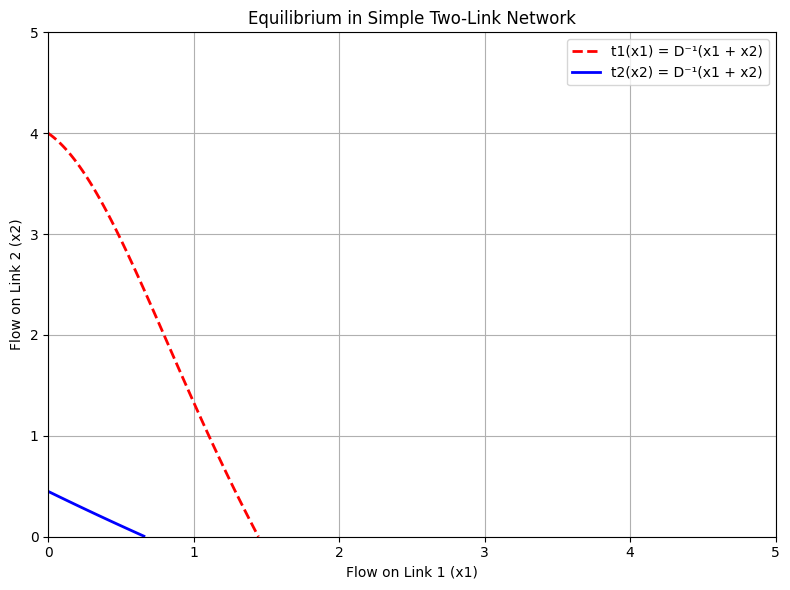

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup
start, end, resolution = 0, 5, 300
x1_vals = np.linspace(start, end, resolution)
x2_vals = np.linspace(start, end, resolution)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Travel time and inverse demand functions
T1 = 1 + 0.5 * X1**2
T2 = 3 + X2
Q = X1 + X2
D_inv = 5 / (Q + 1)

# Difference functions
F1 = T1 - D_inv
F2 = T2 - D_inv

# Plot
plt.figure(figsize=(8, 6))
contour1 = plt.contour(X1, X2, F1, levels=[0], colors='red', linewidths=2, linestyles='--')
contour2 = plt.contour(X1, X2, F2, levels=[0], colors='blue', linewidths=2, linestyles='-')

# Create proxy artists for the legend (since contour doesn't directly support labels)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', linestyle='--', lw=2, label="t1(x1) = D⁻¹(x1 + x2)"),
    Line2D([0], [0], color='blue', linestyle='-', lw=2, label="t2(x2) = D⁻¹(x1 + x2)")
]

plt.legend(handles=legend_elements)
plt.xlabel("Flow on Link 1 (x1)")
plt.ylabel("Flow on Link 2 (x2)")
plt.title("Equilibrium in Simple Two-Link Network")
plt.grid(True)
plt.tight_layout()
plt.savefig("q1_2.png")
plt.show()


In [34]:
import numpy as np
from scipy.optimize import fsolve

# Define the system of equations
def system(vars):
    x1 = vars[0]
    x2 = 0.5 * x1**2 - 2
    eq1 = 1 + 0.5 * x1**2 - 5 / (x1 + x2 + 1)
    return [eq1]

# Initial guess
x1_sol = fsolve(system, [1])[0]
x2_sol = 0.5 * x1_sol**2 - 2
q_sol = x1_sol + x2_sol

# Print solution
print(f"x1 = {x1_sol:.4f}")
print(f"x2 = {x2_sol:.4f}")
print(f"q  = {q_sol:.4f}")


x1 = 1.6757
x2 = -0.5959
q  = 1.0798


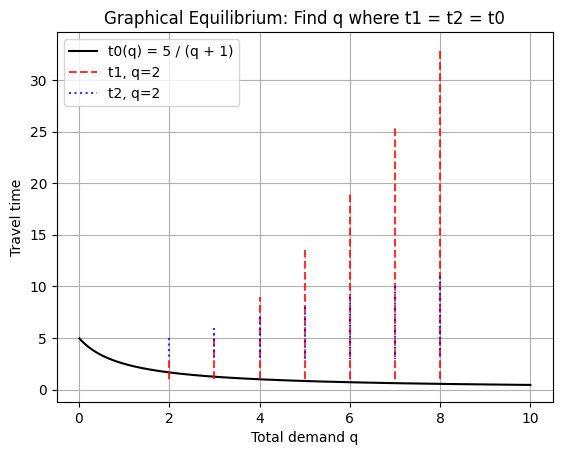

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define travel time functions
def t0(q): return 5 / (q + 1)
def t1(x): return 1 + 0.5 * x**2
def t2(x): return 3 + x

# Define range of total demand (q = x1 + x2)
q_vals = np.linspace(0.01, 10, 1000)

# Store matching values
t0_vals = t0(q_vals)

# Try combinations of x1 from 0 to q, and x2 = q - x1
# We'll plot t1(x1), t2(x2), and see where both intersect t0(q)

fig, ax = plt.subplots()
ax.plot(q_vals, t0_vals, label='t0(q) = 5 / (q + 1)', color='black')

# Try each q and compute t1 + t2 vs t0
for q in [2, 3, 4, 5, 6, 7, 8]:
    x1_vals = np.linspace(0, q, 200)
    x2_vals = q - x1_vals
    t1_vals = t1(x1_vals)
    t2_vals = t2(x2_vals)

    ax.plot([q]*len(x1_vals), t1_vals, '--', alpha=0.8, label=f't1, q={q}' if q==2 else "", c="red")
    ax.plot([q]*len(x2_vals), t2_vals, ':', alpha=0.8, label=f't2, q={q}' if q==2 else "", c="blue")

# Customize plot
ax.set_xlabel("Total demand q")
ax.set_ylabel("Travel time")
ax.set_title("Graphical Equilibrium: Find q where t1 = t2 = t0")
ax.legend()
ax.grid(True)
plt.show()


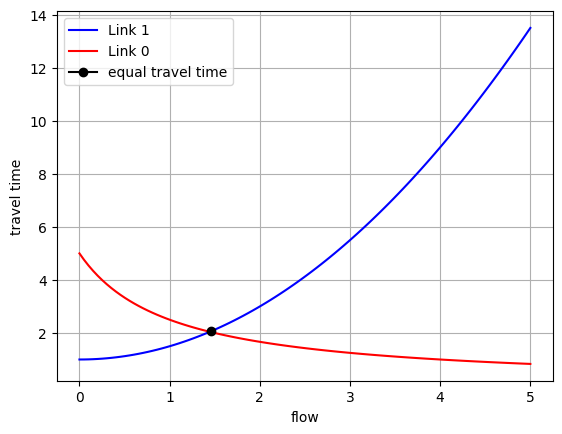

In [45]:
import numpy as np
import matplotlib.pyplot as plt

q = 5
x_values_t1 = np.linspace(0, 5, 100)
x_values_t2 = q - x_values_t1
y_values_t1 = 1 + 0.5 * x_values_t1**2
y_values_t2 = 5 / (1+x_values_t2)

plt.plot(x_values_t1, y_values_t1, label="Link 1", c='Blue')
plt.plot(x_values_t2, y_values_t2, label="Link 0", c="Red")
plt.plot(1.46, 2.07, label="equal travel time", c="Black", marker="o")
plt.ylabel("travel time")
plt.xlabel("flow")
plt.legend()
plt.grid(True)
plt.savefig("q3.png")
plt.show()